### Hos_Rec_ML

<h1><center>Project </center></h1>
<h1><center>by </center></h1>
<h1><center> Piyush Vyas </center></h1>



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import seaborn as sns

#pip install plotly
import plotly
from plotly import graph_objs
# plotly configuration
#plotly.offline.init_notebook_mode()
import matplotlib.pyplot as plt

In [2]:
#load test and train data
train = pd.read_csv("f_ml1adopt01.csv")

# Step 1 Descriptive Analysis:


### Train data shape 

In [3]:
train.shape

(2536, 13)

In [4]:

# have look at the train and test data (first five rows)
print("train data first five rows")
train.head(5)


train data first five rows


,facility_id,measure_code,measure_desc,recommend,ans_percent,rating,ed_score,sep_score,op_score,op_3b_heart_attack_care,imm3_score,op18_score,label
0,111308,SEP_1,Appropriate care for severe sepsis and septic ...,H_RECMND_DY,70,3,72,83,22,99,83,80,0
1,171344,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DY,77,4,72,125,22,87,83,93,0
2,340001,ED_2b,Average (median) time patients spent in the em...,H_RECMND_DY,73,2,80,125,22,99,83,80,0
3,520103,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DN,4,5,72,125,22,95,83,166,1
4,420103,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DN,2,4,72,125,22,83,83,158,1


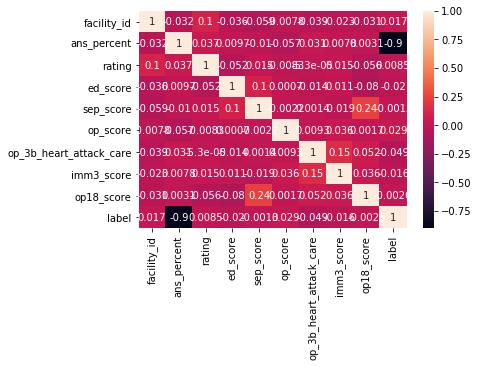

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train.corr(), annot=True)  #.join(train.label)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   facility_id              2536 non-null   int64 
 1   measure_code             2536 non-null   object
 2   measure_desc             2536 non-null   object
 3   recommend                2536 non-null   object
 4   ans_percent              2536 non-null   int64 
 5   rating                   2536 non-null   int64 
 6   ed_score                 2536 non-null   int64 
 7   sep_score                2536 non-null   int64 
 8   op_score                 2536 non-null   int64 
 9   op_3b_heart_attack_care  2536 non-null   int64 
 10  imm3_score               2536 non-null   int64 
 11  op18_score               2536 non-null   int64 
 12  label                    2536 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 257.7+ KB


In [8]:
y = train.iloc[:,12].values 

In [9]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [10]:
data=train.drop(columns = ['measure_code','measure_desc','recommend','facility_id' ,'label'] )

In [11]:
data = preprocessing.MinMaxScaler().fit_transform(data)

In [12]:
y=np.where(y==0, 1, 0)

In [11]:
#pip install plotly

# Step 3 : Modelbuilding 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state=999)


In [14]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [15]:
x_train

array([[0.06060606, 0.75      , 0.13976378, ..., 0.16470588, 0.92424242,
        0.07119741],
       [0.1010101 , 0.5       , 0.0984252 , ..., 0.07843137, 0.31818182,
        0.07119741],
       [0.04040404, 0.5       , 0.13976378, ..., 0.27058824, 0.86363636,
        0.26860841],
       ...,
       [0.03030303, 0.75      , 0.13976378, ..., 0.19215686, 0.75757576,
        0.07119741],
       [0.77777778, 0.75      , 0.13976378, ..., 0.16470588, 0.75757576,
        0.25889968],
       [0.78787879, 0.75      , 0.13976378, ..., 0.16470588, 0.74242424,
        0.07119741]])

In [16]:
x_train.shape

(1902, 8)

In [17]:
y_train.shape

(1902,)

## KNN

In [17]:
#KNN Hyperparameter Tuning 

#define a dictionary of KNN parameters for the grid search. Here, we will consider K values between 3 and 7 and  p  values of 1 (Manhattan), 2 (Euclidean), and 5 (Minkowski).
import numpy as np
params_KNN = {'n_neighbors': [1,3, 5, 7,9,11], 
              'p': [1, 2, 5]}


In [18]:
#we pass the KNeighborsClassifier() and KNN_params as the model and the parameter dictionary into the GridSearchCV function. In addition, we include the repeated stratified CV method we defined previously (cv=cv_method). Also, we tell sklearn which metric to optimize, which is accuracy in our example (scoring='accuracy', refit='accuracy').
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=5,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [19]:
# last step is to fit a KNN model using the train dataset.
gs_KNN.fit(x_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   34.3s finished


In [20]:
gs_KNN.best_params_

{'n_neighbors': 11, 'p': 2}

In [21]:
gs_KNN.best_score_

0.9351979997676011

In [22]:
gs_KNN.cv_results_['mean_test_score']

array([0.93265003, 0.93293331, 0.93265003, 0.92953949, 0.9292566 ,
       0.92897372, 0.93180578, 0.93123921, 0.93123921, 0.93236995,
       0.93180378, 0.93152089, 0.93152089, 0.93038855, 0.93067223,
       0.93463223, 0.935198  , 0.93463183])

In [23]:
#Let's visualize the hyperparameter tuning results from the cross-validation. We define a data frame by combining gs.cv_results_['params'] and gs.cv_results_['mean_test_score']. The gs.cv_results_['params'] is an array of hyperparameter combinations.

import pandas as pd

results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [24]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']

In [25]:
#Let's create a new column called "metric" that stores the name of the metric for each  p  value
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,test_score,metric
0,1,1,0.932650,Manhattan
1,1,2,0.932933,Euclidean
2,1,5,0.932650,Minkowski
3,3,1,0.929539,Manhattan
4,3,2,0.929257,Euclidean
5,3,5,0.928974,Minkowski
6,5,1,0.931806,Manhattan
7,5,2,0.931239,Euclidean
8,5,5,0.931239,Minkowski
9,7,1,0.932370,Manhattan


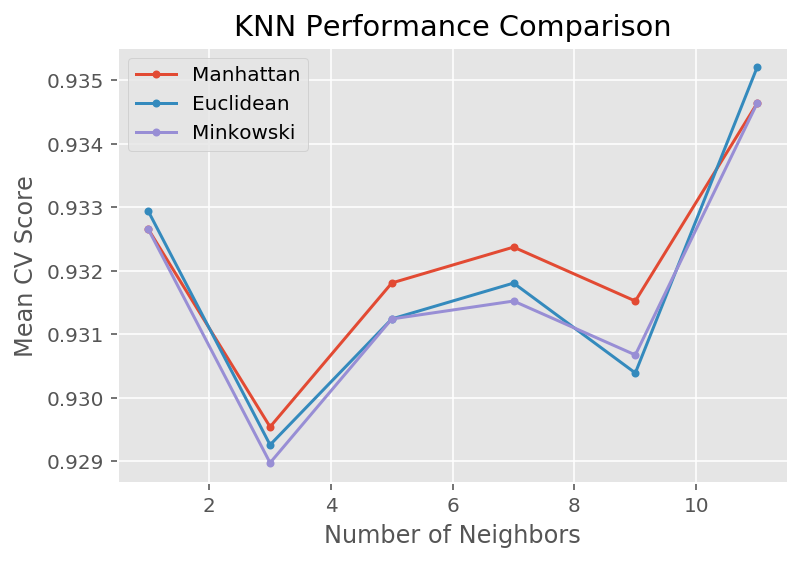

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

In [30]:
!pip install statsmodels

In [18]:
#X2 = sm.add_constant(df_X)
#import regression.linear_model.OLS from statsmodels #as sm #.regression.linear_model.OLS
import statsmodels.api as sm
est = sm.OLS(y_train,x_train)
est2 = est.fit()
print(est2.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              2464.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:43:00   Log-Likelihood:                          275.44
No. Observations:                1902   AIC:                                     -534.9
Df Residuals:                    1894   BIC:                                     -490.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

KNN algorithm testset accuracy: 91.6403785488959
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       309
           1       0.94      0.89      0.92       325

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



0.916403785488959

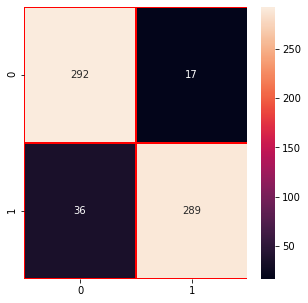

In [21]:
# lets fit final KNN with p=2 and 11 N
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=11, p=2)

knn_classifier.fit(x_train, y_train)

knn_classifier.score(x_test, y_test)

y_pred=knn_classifier.predict(x_test)
print("KNN algorithm testset accuracy:",knn_classifier.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,knn_classifier.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_knn,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('KNN.png',dpi=300)
knn_classifier.score(x_test, y_test)

## bayes

In [28]:
#Gaussian Naive Bayes Hyperparameter Tuning 
#var_smoothing parameter specifies the portion of the largest variance of all features to be added to variances for calculation stability.
#var_smoothing parameter's default value is  10−9.we will use the logspace function in the numpy module
np.logspace(0,-9, num=10)


array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [29]:
#we pass the KNeighborsClassifier() and KNN_params as the model and the parameter dictionary into the GridSearchCV function. In addition, we include the repeated stratified CV method we defined previously (cv=cv_method). Also, we tell sklearn which metric to optimize, which is accuracy in our example (scoring='accuracy', refit='accuracy').
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_train)

gs_NB.fit(Data_transformed, y_train);


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished


In [30]:
# last step is to fit a NBmodel using the train dataset.
#gs_NB.fit(x_train, y_train);

In [31]:
gs_NB.best_params_

{'var_smoothing': 0.04328761281083057}

In [32]:
gs_NB.best_score_

0.93491791914926

In [33]:
gs_NB.cv_results_['mean_test_score']

array([0.93067103, 0.9312368 , 0.93095392, 0.93010526, 0.93010526,
       0.93010526, 0.93010526, 0.93010526, 0.93010526, 0.93010526,
       0.92982197, 0.92953909, 0.92982197, 0.93237155, 0.93491752,
       0.93491792, 0.93463503, 0.93322061, 0.93067504, 0.93095792,
       0.9315241 , 0.93180738, 0.93180738, 0.9315245 , 0.9275641 ,
       0.92784699, 0.92841316, 0.92841316, 0.92841316, 0.92841316,
       0.92841316, 0.92841316, 0.92841316, 0.92841316, 0.92841316,
       0.92841316, 0.92813027, 0.92813027, 0.92813027, 0.92813027,
       0.92813027, 0.92813027, 0.92813027, 0.92813027, 0.92813027,
       0.92813027, 0.92813027, 0.92813027, 0.92813027, 0.92813027,
       0.92813027, 0.92813027, 0.92813027, 0.92813027, 0.92813027,
       0.92813027, 0.92813027, 0.92813027, 0.92813027, 0.92813027,
       0.92813027, 0.92813027, 0.92813027, 0.92813027, 0.92813027,
       0.92813027, 0.92813027, 0.92813027, 0.92813027, 0.92813027,
       0.92813027, 0.92813027, 0.92813027, 0.92813027, 0.92813

In [34]:
#Let's visualize the hyperparameter tuning results from the cross-validation. We define a data frame by combining gs.cv_results_['params'] and gs.cv_results_['mean_test_score']. The gs.cv_results_['params'] is an array of hyperparameter combinations.

import pandas as pd

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

In [35]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [36]:
#Let's create a new column called "metric" that stores the name of the metric for each  p  value
#results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
#results_KNN

No handles with labels found to put in legend.


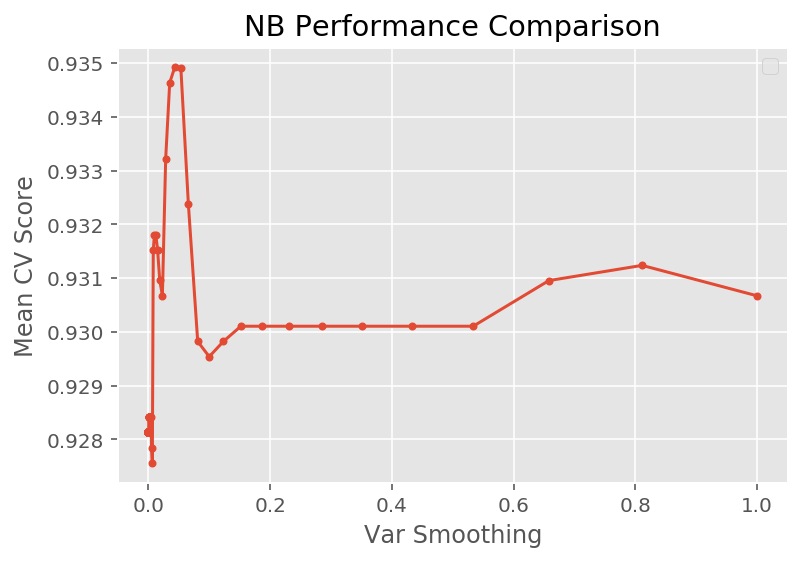

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

#for i in ["Manhattan", "Euclidean", "Minkowski"]:
    #temp = results_KNN[results_KNN['metric'] == i]

plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')
    
plt.legend()
plt.xlabel('Var Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

GNB algorithm testset accuracy: 91.6403785488959
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       1.00      0.83      0.91       325

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.93      0.91      0.91       634



0.9116719242902208

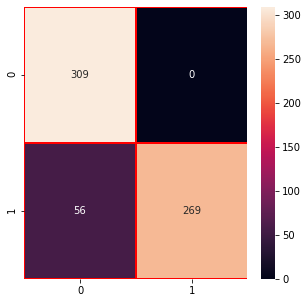

In [22]:
# lets fit final GNB with var_smoothing': 0.04328761281083057
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB(var_smoothing=0.0432)

GNB_classifier.fit(x_train, y_train)
GNB_classifier.score(x_test, y_test)

y_pred=GNB_classifier.predict(x_test)
print("GNB algorithm testset accuracy:",knn_classifier.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_GNB=confusion_matrix(y_test,GNB_classifier.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
g=sns.heatmap(cm_GNB,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=g.get_figure()
fig.savefig('GNB.png',dpi=300)
GNB_classifier.score(x_test, y_test)

## LOG Reg

In [43]:
#The C parameter controls the penality strength, which can also be effective.C in [100, 10, 1.0, 0.1, 0.01]

import numpy as np
params_lr = {'C': [100, 10, 1.0, 0.1, 0.01]}

In [44]:
#we pass the LR() and KNN_params as the model and the parameter dictionary into the GridSearchCV function. In addition, we include the repeated stratified CV method we defined previously (cv=cv_method). Also, we tell sklearn which metric to optimize, which is accuracy in our example (scoring='accuracy', refit='accuracy').
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

gs_lr = GridSearchCV(estimator=LogisticRegression(), 
                      param_grid=params_lr, 
                      cv=5,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [45]:
# last step is to fit a KNN model using the train dataset.
gs_lr.fit(x_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


In [46]:
gs_lr.best_params_

{'C': 0.1}

In [47]:
gs_lr.best_score_

0.9323687447660184

In [48]:
gs_lr.cv_results_['mean_test_score']

array([0.93038935, 0.92897372, 0.92982278, 0.93236874, 0.93236874])

In [49]:
#Let's visualize the hyperparameter tuning results from the cross-validation. We define a data frame by combining gs.cv_results_['params'] and gs.cv_results_['mean_test_score']. The gs.cv_results_['params'] is an array of hyperparameter combinations.

import pandas as pd

results_lr = pd.DataFrame(gs_lr.cv_results_['params'])

In [50]:
results_lr['test_score'] = gs_lr.cv_results_['mean_test_score']

In [51]:
#Let's create a new column called "metric" that stores the name of the metric for each  p  value
#results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_lr

,C,test_score
0,100.00,0.930389
1,10.00,0.928974
2,1.00,0.929823
3,0.10,0.932369
4,0.01,0.932369


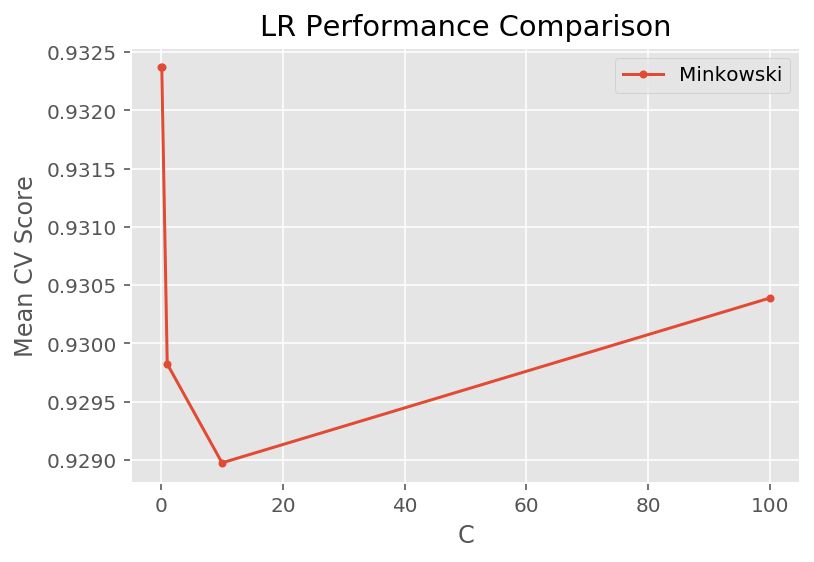

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

#for i in ["Manhattan", "Euclidean", "Minkowski"]:
   # temp = results_KNN[results_KNN['metric'] == i]

plt.plot(results_lr['C'], results_lr['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title("LR Performance Comparison")
plt.show()

LR algorithm testset accuracy: 91.16719242902208
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       1.00      0.83      0.91       325

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.93      0.91      0.91       634



0.9116719242902208

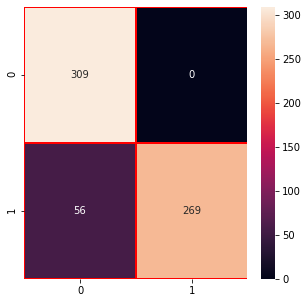

In [24]:
# lets fit final LR with p=2 and 11 N
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(C=0.1)

lr_classifier.fit(x_train, y_train)
lr_classifier.score(x_test, y_test)

y_pred=lr_classifier.predict(x_test)
print("LR algorithm testset accuracy:",lr_classifier.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,lr_classifier.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_lr,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('LR.png',dpi=300)
lr_classifier.score(x_test, y_test)

## SVM

In [22]:
#The C parameter controls the penality strength, which can also be effective.C in [100, 10, 1.0, 0.1, 0.01]

import numpy as np
params_svc = {'C': [100, 10, 1.0, 0.1, 0.01], 'kernel' : ['poly', 'rbf', 'sigmoid']}

In [23]:
#we pass the LR() and KNN_params as the model and the parameter dictionary into the GridSearchCV function. In addition, we include the repeated stratified CV method we defined previously (cv=cv_method). Also, we tell sklearn which metric to optimize, which is accuracy in our example (scoring='accuracy', refit='accuracy').
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gs_svc = GridSearchCV(estimator=SVC(), 
                      param_grid=params_svc, 
                      cv=5,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [24]:
# last step is to fit a KNN model using the train dataset.
gs_svc.fit(x_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   16.3s finished


In [26]:
gs_svc.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [27]:
gs_svc.best_score_

0.9320858593346182

In [28]:
gs_svc.cv_results_['mean_test_score']

array([0.92755809, 0.92472883, 0.51924022, 0.92840795, 0.92840715,
       0.5175433 , 0.92812426, 0.92925701, 0.51414708, 0.92897372,
       0.93208586, 0.52433135, 0.92529541, 0.93180257, 0.57272199])

In [30]:
#Let's visualize the hyperparameter tuning results from the cross-validation. We define a data frame by combining gs.cv_results_['params'] and gs.cv_results_['mean_test_score']. The gs.cv_results_['params'] is an array of hyperparameter combinations.

import pandas as pd

results_svc = pd.DataFrame(gs_svc.cv_results_['params'])

In [31]:
results_svc['test_score'] = gs_svc.cv_results_['mean_test_score']

In [33]:
#Let's create a new column called "metric" that stores the name of the metric for each  p  value
results_svc['metric'] = results_svc['kernel'] #.replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_svc

,C,kernel,test_score,metric
0,100.00,poly,0.927558,poly
1,100.00,rbf,0.924729,rbf
2,100.00,sigmoid,0.519240,sigmoid
3,10.00,poly,0.928408,poly
4,10.00,rbf,0.928407,rbf
5,10.00,sigmoid,0.517543,sigmoid
6,1.00,poly,0.928124,poly
7,1.00,rbf,0.929257,rbf
8,1.00,sigmoid,0.514147,sigmoid
9,0.10,poly,0.928974,poly


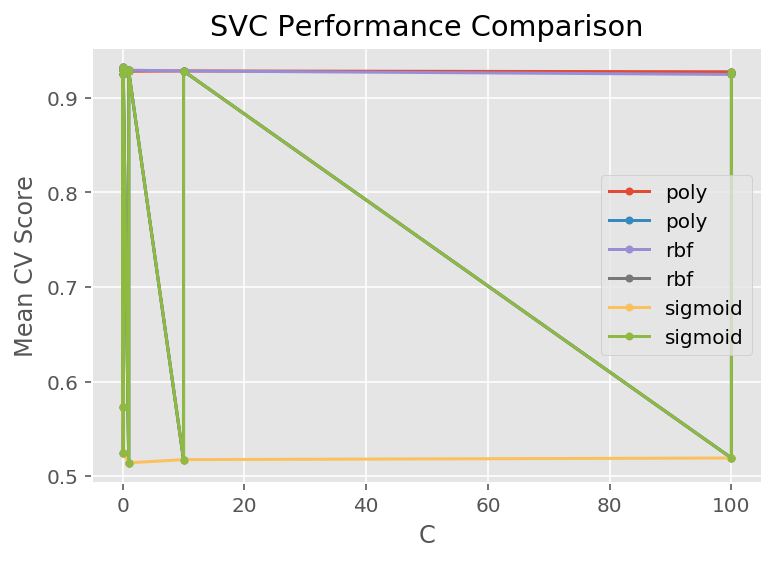

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

#for i in ["Manhattan", "Euclidean", "Minkowski"]:
   # temp = results_KNN[results_KNN['metric'] == i]

    
for i in ['poly', 'rbf', 'sigmoid']:
    temp = results_svc[results_svc['metric'] == i]
    plt.plot(temp['C'], temp['test_score'], marker = '.', label = i)
    plt.plot(results_svc['C'], results_svc['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title("SVC Performance Comparison")
plt.show()

SVM algorithm testset accuracy: 91.16719242902208
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       1.00      0.83      0.91       325

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.93      0.91      0.91       634



0.9116719242902208

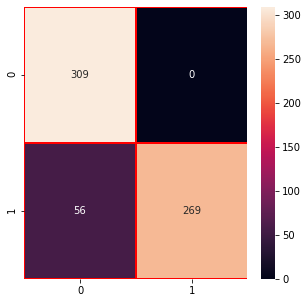

In [26]:
# lets fit final KNN with p=2 and 11 N
from sklearn.svm import SVC
svc_classifier = SVC(C=0.1,kernel = 'rbf')

svc_classifier.fit(x_train, y_train)
svc_classifier.score(x_test, y_test)

y_pred=svc_classifier.predict(x_test)
print("SVM algorithm testset accuracy:",svc_classifier.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svc=confusion_matrix(y_test,svc_classifier.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_svc,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('SVC.png',dpi=300)
svc_classifier.score(x_test, y_test)

## DT

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=dt_classifier,
                     param_grid=params_DT, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=999,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [45]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

In [46]:
gs_DT.best_score_

0.9354848920748002

In [47]:
gs_DT.cv_results_['mean_test_score']

array([0.92671104, 0.92671104, 0.92671104, 0.92671104, 0.9235993 ,
       0.9235993 , 0.92416507, 0.92416507, 0.93180297, 0.93180297,
       0.93548489, 0.93548489, 0.92954149, 0.92954149, 0.93123881,
       0.93152169, 0.92671104, 0.92671104, 0.92671104, 0.92671104,
       0.9235993 , 0.9235993 , 0.92416507, 0.92416507, 0.92473084,
       0.92473084, 0.93011007, 0.93011007, 0.92925861, 0.92925861,
       0.92982398, 0.93010686])

In [48]:
#Let's visualize the hyperparameter tuning results from the cross-validation. We define a data frame by combining gs.cv_results_['params'] and gs.cv_results_['mean_test_score']. The gs.cv_results_['params'] is an array of hyperparameter combinations.

import pandas as pd

results_DT = pd.DataFrame(gs_DT.cv_results_['params'])

In [50]:
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']

In [51]:
#Let's create a new column called "metric" that stores the name of the metric for each  p  value
#results_svc['metric'] = results_svc['kernel'] #.replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_DT

,criterion,max_depth,min_samples_split,test_score
0,gini,1,2,0.926711
1,gini,1,3,0.926711
2,gini,2,2,0.926711
3,gini,2,3,0.926711
4,gini,3,2,0.923599
5,gini,3,3,0.923599
6,gini,4,2,0.924165
7,gini,4,3,0.924165
8,gini,5,2,0.931803
9,gini,5,3,0.931803


DT algorithm testset accuracy: 92.42902208201893
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       309
           1       0.93      0.93      0.93       325

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



0.9242902208201893

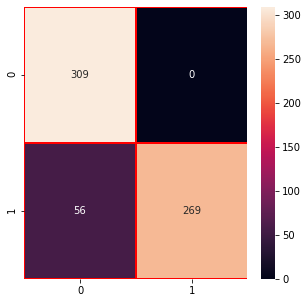

In [27]:
# lets fit final KNN with p=2 and 11 N
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split= 2)

dt_classifier.fit(x_train, y_train)
dt_classifier.score(x_test, y_test)

y_pred=dt_classifier.predict(x_test)
print("DT algorithm testset accuracy:",dt_classifier.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,svc_classifier.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_dt,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('DT.png',dpi=300)
dt_classifier.score(x_test, y_test)

## RF

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=999)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5, 6, 7, 8] #or [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
params_rf = {'n_estimators' : n_estimators,     #can add 'max_features': ['auto', 'sqrt'],
            'criterion': ['gini', 'entropy'],
             'max_depth': max_depth,
             'min_samples_split': [2, 3]}

gs_rf = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_rf, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 44.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=999,
                                 

In [20]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 600}

In [21]:
gs_rf.best_score_

0.9335002864916196

In [22]:
gs_rf.cv_results_['mean_test_score']

array([0.92388218, 0.92699392, 0.92671104, 0.92671104, 0.92671104,
       0.92671104, 0.92671104, 0.92671104, 0.92671104, 0.92671104,
       0.92388218, 0.92699392, 0.92671104, 0.92671104, 0.92671104,
       0.92671104, 0.92671104, 0.92671104, 0.92671104, 0.92671104,
       0.92444795, 0.92671104, 0.92671104, 0.92642815, 0.92671104,
       0.92671104, 0.92642815, 0.92671104, 0.92671104, 0.92671104,
       0.92444795, 0.92671104, 0.92671104, 0.92642815, 0.92671104,
       0.92671104, 0.92642815, 0.92671104, 0.92671104, 0.92671104,
       0.92925701, 0.92586238, 0.92897412, 0.92897412, 0.92869123,
       0.92614527, 0.92642815, 0.92642815, 0.92614527, 0.92614527,
       0.92982278, 0.92586238, 0.92897412, 0.92869123, 0.92869123,
       0.92614527, 0.92642815, 0.92897412, 0.92614527, 0.92614527,
       0.93010566, 0.92953989, 0.92671104, 0.92699392, 0.92784258,
       0.92529661, 0.92557949, 0.92557949, 0.92557949, 0.92529661,
       0.93010566, 0.92953989, 0.92925701, 0.92953989, 0.92897

In [23]:
#Let's visualize the hyperparameter tuning results from the cross-validation. We define a data frame by combining gs.cv_results_['params'] and gs.cv_results_['mean_test_score']. The gs.cv_results_['params'] is an array of hyperparameter combinations.

import pandas as pd

results_rf = pd.DataFrame(gs_rf.cv_results_['params'])

In [24]:
results_rf['test_score'] = gs_rf.cv_results_['mean_test_score']

In [25]:
#Let's create a new column called "metric" that stores the name of the metric for each  p  value
#results_svc['metric'] = results_svc['kernel'] #.replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_rf

,criterion,max_depth,min_samples_split,n_estimators,test_score
0,gini,1.0,2,100,0.923882
1,gini,1.0,2,200,0.926994
2,gini,1.0,2,300,0.926711
3,gini,1.0,2,400,0.926711
4,gini,1.0,2,500,0.926711
...,...,...,...,...,...
355,entropy,NaN,3,600,0.933500
356,entropy,NaN,3,700,0.931803
357,entropy,NaN,3,800,0.931803
358,entropy,NaN,3,900,0.931803


RF algorithm testset accuracy: 92.58675078864354
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       309
           1       0.95      0.91      0.93       325

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



0.9258675078864353

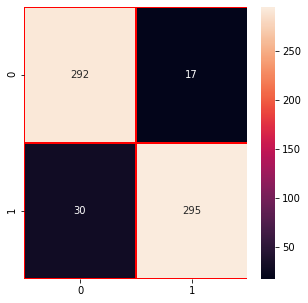

In [33]:
# lets fit final KNN with p=2 and 11 N
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=None, min_samples_split= 2 )

rf_classifier.fit(x_train, y_train)
rf_classifier.score(x_test, y_test)

y_pred=rf_classifier.predict(x_test)
print("RF algorithm testset accuracy:",rf_classifier.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,rf_classifier.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_rf,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('RF1.png',dpi=300)
rf_classifier.score(x_test, y_test)

In [30]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(x_train, y_train)
print(clf.score(x_test, y_test))
y_pred=clf.predict(x_test)
print("MLP algorithm testset accuracy:",clf.score(x_test,y_test)*100)
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

0.9211356466876972
MLP algorithm testset accuracy: 92.11356466876973
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       309
           1       0.91      0.94      0.92       325

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



0.9274447949526814

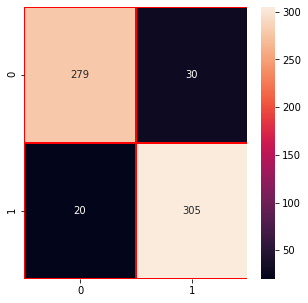

In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_mlp=confusion_matrix(y_test,clf.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_mlp,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('MLP.png',dpi=300)
rf_classifier.score(x_test, y_test)

MultinomialNB algorithm accuracy: 73.22036737200604
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     13757
           1       0.75      0.72      0.73     12579
           2       0.67      0.72      0.69      9486

    accuracy                           0.73     35822
   macro avg       0.73      0.73      0.73     35822
weighted avg       0.73      0.73      0.73     35822



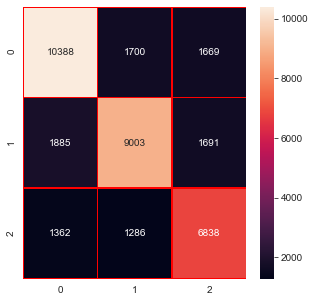

In [22]:
#MLN Navie Bayes Classification Algorithm
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB #GaussianNB,
#nb=GaussianNB()
ml=MultinomialNB(alpha=0.6)
ml.fit(x_train,y_train)
#Test
y_pred=ml.predict(x_test)


# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ml=confusion_matrix(y_test,ml.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_ml,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('mlbys.png',dpi=300)

GNB algorithm accuracy: 67.11797219585729
              precision    recall  f1-score   support

           0       0.80      0.52      0.63     13757
           1       0.63      0.85      0.73     12579
           2       0.62      0.65      0.64      9486

    accuracy                           0.67     35822
   macro avg       0.69      0.67      0.66     35822
weighted avg       0.69      0.67      0.67     35822



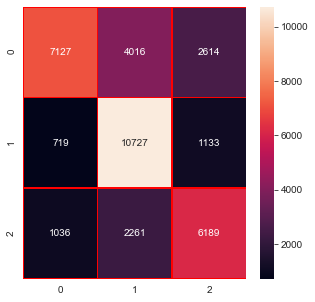

In [24]:
#Navie Bayes Classification Algorithm
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

nb.fit(x_train,y_train)
#Test
y_pred=nb.predict(x_test)
print("GNB algorithm accuracy:",
      nb.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(y_test,nb.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_nb,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
fig.savefig('Gbys.png',dpi=300)

In [25]:
#KNN Classification Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Knn algorithm accuracy=",knn.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,knn.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
d=sns.heatmap(cm_knn,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

fig=d.get_figure()
fig.savefig('knn.png',dpi=300)

MemoryError: Unable to allocate 1.33 GiB for an array with shape (35822, 5000) and data type float64

Random Forest algorithm accuracy = 77.26257607057116
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     13757
           1       0.73      0.85      0.79     12579
           2       0.77      0.65      0.70      9486

    accuracy                           0.77     35822
   macro avg       0.77      0.76      0.76     35822
weighted avg       0.78      0.77      0.77     35822



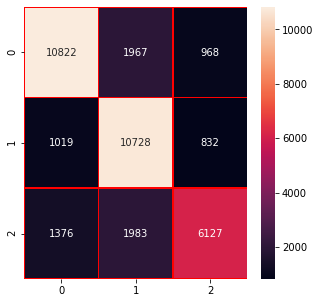

In [19]:
#Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=51,random_state=1) #n_estimators=100
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Random Forest algorithm accuracy =",rf.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,rf.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
e=sns.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
fig=e.get_figure()
fig.savefig('rf.png',dpi=300)

Decision Tree algorithm accuracy= 63.90207135279996
              precision    recall  f1-score   support

           0       0.85      0.55      0.66     13757
           1       0.53      0.94      0.68     12579
           2       0.77      0.37      0.50      9486

    accuracy                           0.64     35822
   macro avg       0.72      0.62      0.61     35822
weighted avg       0.72      0.64      0.63     35822



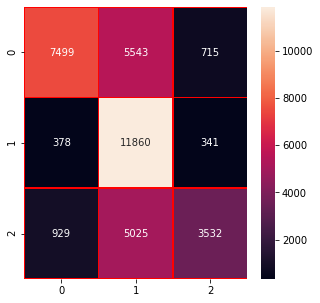

In [17]:
#Decision Tree Classification Algorithm
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth = 73 ) #criterian=gini random_state = 0 max_depth =101
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Decision Tree algorithm accuracy=",dt.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,dt.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
f=sns.heatmap(cm_dt,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

fig=f.get_figure()
fig.savefig('dt.png',dpi=300)

C:\Users\DSU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression algorithm accuracy = 78.5076210150187
              precision    recall  f1-score   support

           0       0.86      0.78      0.81     13757
           1       0.72      0.90      0.80     12579
           2       0.81      0.64      0.72      9486

    accuracy                           0.79     35822
   macro avg       0.79      0.77      0.78     35822
weighted avg       0.80      0.79      0.78     35822



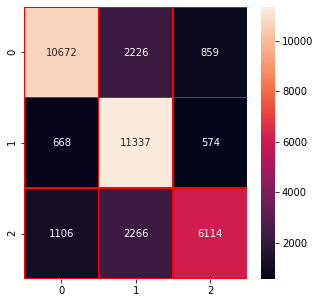

In [18]:
#Logistic Regression Classification Algorithm
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=11)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Logistic Regression algorithm accuracy =",lr.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,lr.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
g=sns.heatmap(cm_lr,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

fig=g.get_figure()
fig.savefig('lr.png',dpi=300)

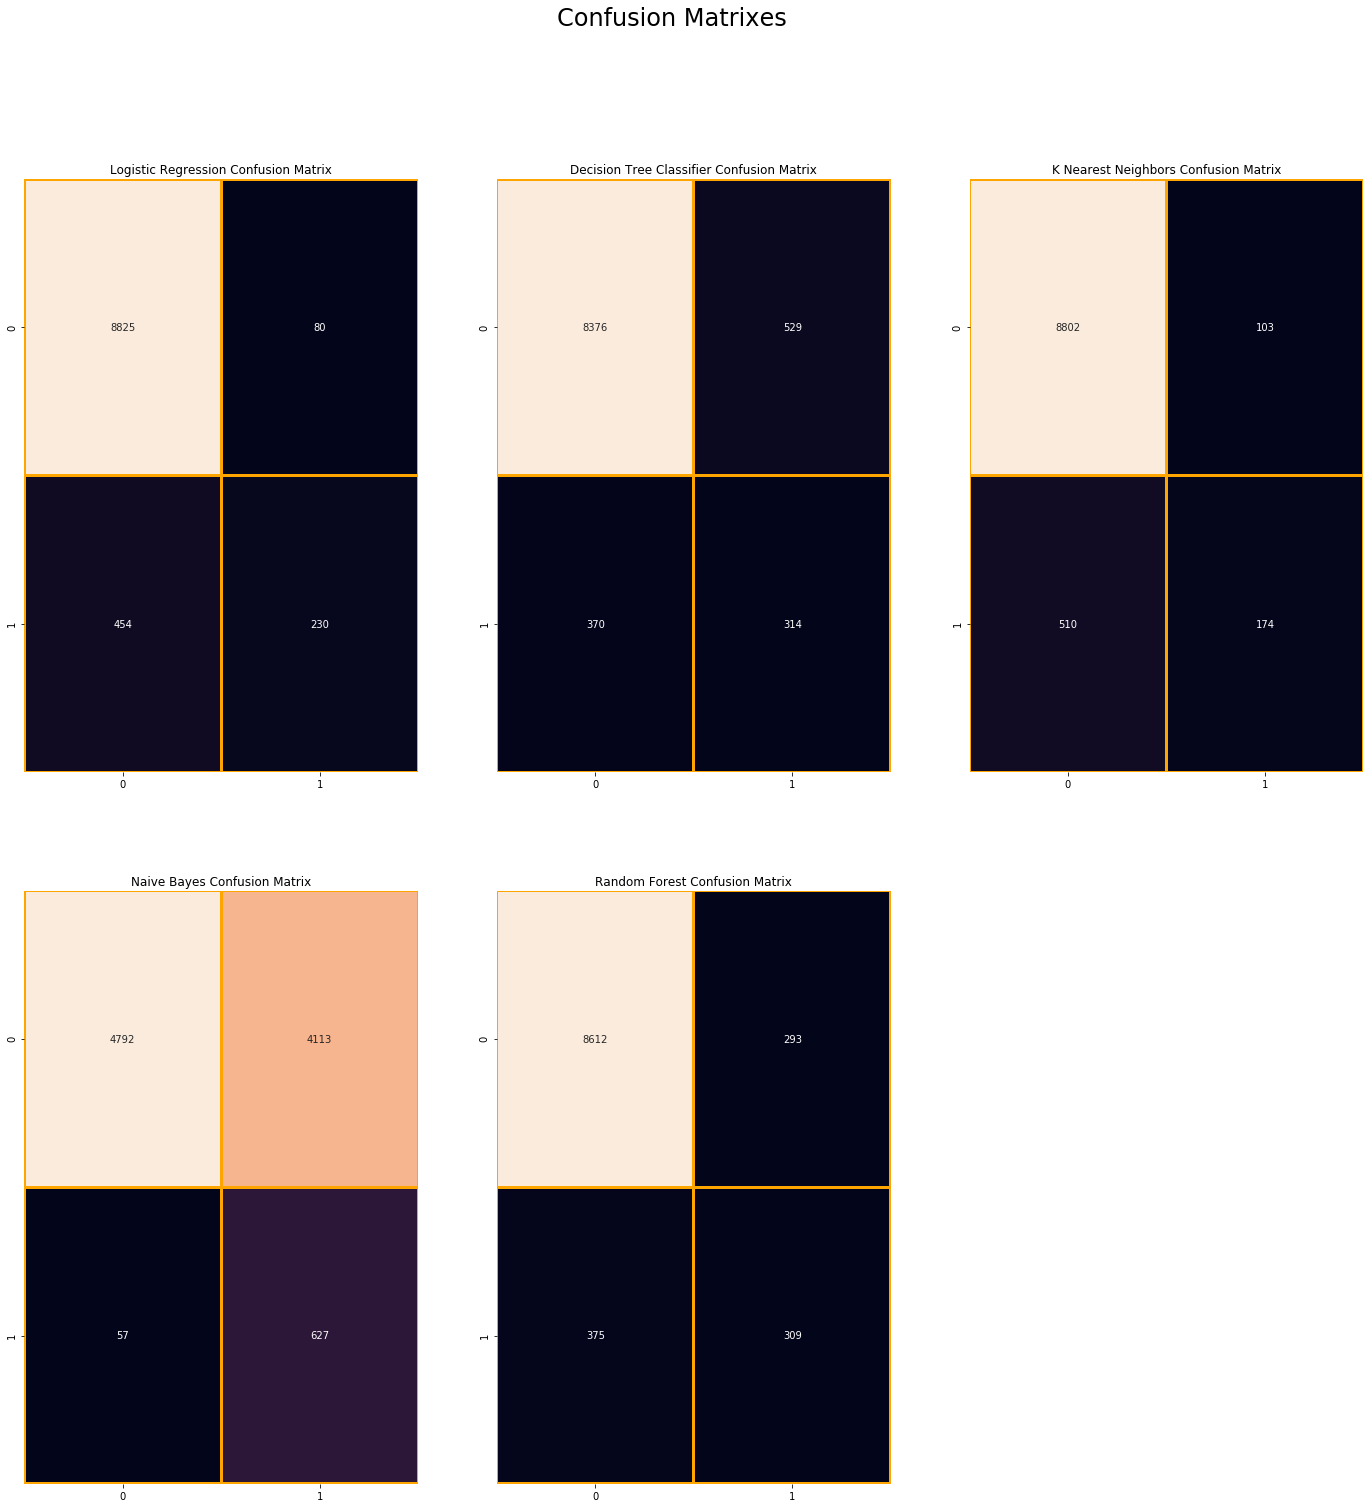

In [31]:
plt.figure(figsize=(24,24))
plt.suptitle("Confusion Matrixes",fontsize=24)
#Logistic Regression Confusion Matrix
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#Decision Tree Confusion Matrix
plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#K Nearest Neighbors Confusion Matrix
plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#Naive Bayes Confusion Matrix
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#Random Forest Confusion Matrix
plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")

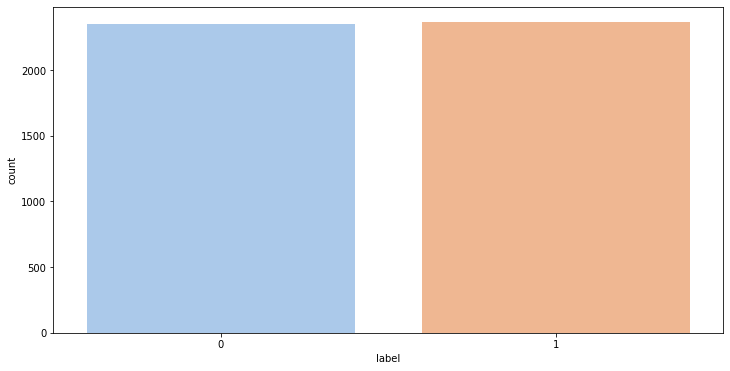

In [46]:
import seaborn as sns
plt.figure(figsize=(12,6))
b=sns.countplot(x=train['label'],data=train['label'],palette="pastel") #palette = flare or Set3
fig=b.get_figure()
#fig.savefig('1.png',dpi=300)